https://www.analyticsvidhya.com/blog/2017/07/introduction-to-genetic-algorithm/

http://hjemmesider.diku.dk/~pisinger/codes.html

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import cufflinks as cf
import numpy as np
import pandas as pd
from evol import Evolution, Population

from genetic_algorithms.problems.knapsack import Knapsack
from genetic_algorithms.utils import MyLogger
from loguru import logger

cf.go_offline()

In [35]:
np.random.seed(42)
knps = Knapsack(n_items=8, capacity=256)

In [36]:
problem_instance = knps
generations= 200
logger = MyLogger(200)

In [37]:
pop = Population.generate(
    init_function=knps.solution_candidate,
    eval_function=knps.solution_fitness,
    size=100,
    maximize=True,
)

In [38]:
evo = (
    Evolution()
    .survive(fraction=0.4)
    .breed(parent_picker=knps.select, combiner=knps.crossover)
    # .mutate(mutate_function=add_noise, sigma=noise)
    .evaluate()
    .callback(logger.log)
)

In [39]:
pop.evolve(evo, n=generations)

<Population with size 100 at 2582828755432>

In [40]:
pop.evaluate()

<Population with size 100 at 2582828657632>

In [41]:
t = pop.current_best.chromosome
knps.solution_value(t)

4030

In [42]:
knps.is_feasible(t)

True

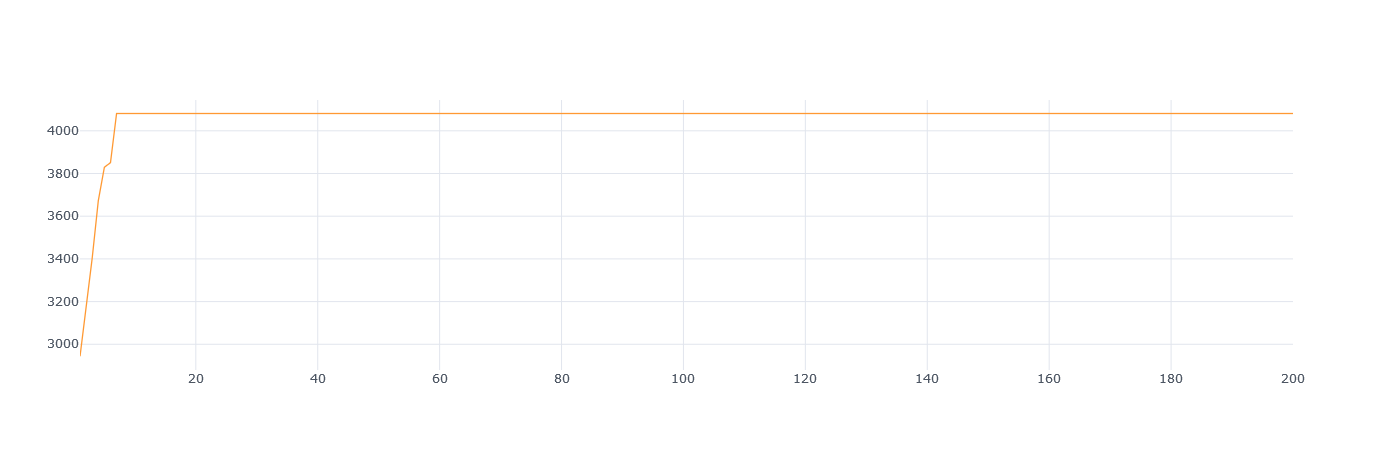

In [45]:
pd.DataFrame.from_records(logger.individuals_by_generation).groupby("generation").agg("mean").iplot(kind="scatter", y="individual_fitness")

In [44]:
import pulp
pulp.value(knps.lp_solve()[0].objective)

2019-07-14 21:22:29.241 | DEBUG    | genetic_algorithms.problems.knapsack.knapsack:lp_solve:97 - Optimal


4037.0

In [34]:
knps.solution_candidate()

array([1, 0, 1, 1, 1, 0, 1, 0])

# Typing monkey

In [2]:
class TypingMonkeyLogger:
    def __init__(self):
        self.generation = 0
        self.iterations = []
    def log(self, population):
        self.generation += 1
        for i in population.evaluate():
            string = i.chromosome
            fitness = i.fitness
            self.iterations.append({"generation": self.generation, "string": string, "fitness": fitness})

In [3]:
from fuzzywuzzy import fuzz

In [71]:
objective = "tobeornottobe"

In [76]:
def fitness(string):
    #return fuzz.partial_ratio("tobeornottobe", string)
    #import ipdb; ipdb.set_trace()
    reference = np.array(list("tobeornottobe"))
    candidate = np.array(list(string))
    return np.sum(reference == candidate) / len(objective)

In [77]:
def random_candidate():
    return "".join([chr(i) for i in np.random.randint(ord("a"), ord("z") + 1, size=len(objective))])

In [78]:
def select(population):
    top_10 = sorted(population, key=lambda x: x.fitness)[:-10]
    parent1, parent2 = np.random.choice(top_10, size=2)
    return parent1, parent2

In [79]:
def crossover(*parents):
    parent1, parent2 = parents
    m = np.random.randint(0, len(objective))
    child = f"{parent1[:m]}{parent2[m:]}"
    return child

In [80]:
def mutate(string):
    toss = np.random.exponential()
    if toss > 1:
        i = np.random.randint(0, len(objective))
        random_letter = chr(np.random.randint(ord("a"), ord("z")))
        string_to_list = list(string)
        string_to_list[i] = random_letter
        return "".join(string_to_list)
    return string

In [81]:
logger = TypingMonkeyLogger()
pop = Population.generate(
    init_function=random_candidate, eval_function=fitness, size=100
)
evolution = (
    Evolution()
    .survive(fraction=0.2)
    .breed(parent_picker=select, combiner=crossover)
    .callback(logger.log)
    .mutate(mutate_function=mutate)
)

In [82]:
pop.evolve(evolution, 500)

<Population with size 100 at 2513956823336>

In [83]:
pop.evaluate()

<Population with size 100 at 2513956872376>

In [84]:
fitness(pop.current_best.chromosome)

0.15384615384615385

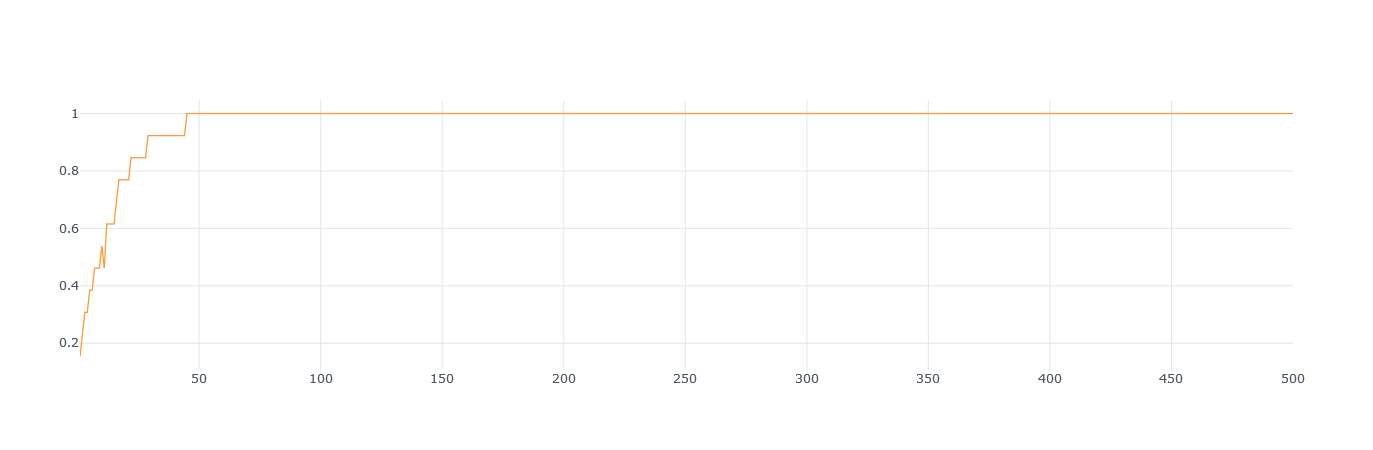

In [85]:
df = pd.DataFrame(logger.iterations)
df.groupby("generation").agg("max").iplot(kind="scatter", y="fitness")

In [86]:
df.loc[df.fitness == df.fitness.max()]

,fitness,generation,string
4400,1.0,45,tobeornottobe
4586,1.0,46,tobeornottobe
4600,1.0,47,tobeornottobe
4620,1.0,47,tobeornottobe
4642,1.0,47,tobeornottobe
4646,1.0,47,tobeornottobe
4676,1.0,47,tobeornottobe
4682,1.0,47,tobeornottobe
4683,1.0,47,tobeornottobe
4693,1.0,47,tobeornottobe
